In [173]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [174]:
from fastbook import *
from fastai.vision.widgets import *

Order for Tabular Model Experimentations: 

`Random forests -> Gradient boosting machines -> Neural networks` 

(based on time considerations) 

# Mental Health

> [mental health kaggle data](https://www.kaggle.com/datasets/shariful07/student-mental-health)

In [175]:
! [ -e /content ] && pip install opendatasets
! [ -e /content ] && pip install dtreeviz
! [ -e /content ] && pip install -f https://sklearn-nightly.scdn8.secure.raxcdn.com scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://sklearn-nightly.scdn8.secure.raxcdn.com


In [176]:
import opendatasets as od
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import random
pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [177]:
od.download("https://www.kaggle.com/datasets/shariful07/student-mental-health?resource=download")

Skipping, found downloaded files in "./student-mental-health" (use force=True to force download)


In [178]:
# read csv into a Pandas DataFrame
df = pd.read_csv('student-mental-health/Student Mental health.csv', low_memory=False)
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [179]:
## data explorations
# find out how many unique topics there are
unique_topics = df["What is your course?"].unique()
unique_topics

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics', 'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs', 'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science', 'KOE',
       'Banking Studies', 'Business Administration', 'Law', 'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA', 'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS', 'engin', 'Econs',
       'MHSC', 'Malcom', 'Kop', 'Human Sciences ', 'Biotechnology', 'Communication ', 'Diploma Nursing', 'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ', 'DIPLOMA TESL', 'Koe',
       'Fiqh', 'Islamic Education', 'Nursing ', 'Pendidikan Islam'], dtype=object)

In [180]:
# map topics to integers
unique_topics_dict = {}
leng = len(unique_topics)
for i in range(leng):
  unique_topics_dict[unique_topics[i]] = i

In [181]:
# use data exploration to update table using one-hot encoding
df["What is your course?"].replace(unique_topics_dict, inplace=True)
df.head(5)

,Timestamp,Choose your gender,Age,What is your course?,...,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,0,...,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,1,...,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,2,...,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,3,...,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,4,...,No,No,No,No


In [182]:
GPAs = df['What is your CGPA?']

In [183]:
def calc_gpa(GPA):
  split = GPA.split()
  split0 = split[0]
  split1 = split[2]
  aveGPA = (float(split0) + float(split1)) / 2
  return GPA, aveGPA

In [184]:
gpa_dict = {}
for GPA in GPAs:
  gpa_dict[GPA] = calc_gpa(GPA)[1]

In [185]:
df["What is your CGPA?"].replace(gpa_dict, inplace=True)
out = df["What is your CGPA?"]
out.head(5)

0    3.245
1    3.245
2    3.245
3    3.245
4    3.245
Name: What is your CGPA?, dtype: float64

In [186]:
# after some further data explorations, more one-hot encoding
df["Do you have Depression?"].replace({"Yes": 1, "No": 0}, inplace=True)
df["Do you have Anxiety?"].replace({"Yes": 1, "No": 0}, inplace=True)
df["Do you have Panic attack?"].replace({"Yes": 1, "No": 0}, inplace=True)
df["Choose your gender"].replace({"Female": 1.0, "Male": 0.0}, inplace=True)
df["Your current year of Study"].replace({"year 1": 1, "year 2": 2, "year 3": 3, "year 4": 4, "Year 1": 1, "Year 2": 2, "Year 3": 3, "Year 4": 4}, inplace=True)
df["Did you seek any specialist for a treatment?"].replace({"Yes": 1, "No": 0}, inplace=True)
df['Marital status'].replace({"Yes": 1, "No": 0}, inplace=True)
df.head(5)

,Timestamp,Choose your gender,Age,What is your course?,...,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,1.0,18.0,0,...,1,0,1,0
1,8/7/2020 12:04,0.0,21.0,1,...,0,1,0,0
2,8/7/2020 12:05,0.0,19.0,2,...,1,1,1,0
3,8/7/2020 12:06,1.0,22.0,3,...,1,0,0,0
4,8/7/2020 12:13,0.0,23.0,4,...,0,0,0,0


In [187]:
# if we want to predict mental health issue likelyhood, we need a 
# metric for this, we will assign a 1 to any YES in mental health  
# related columns and 0 to any NO, then take the sums and put  
# them into a column MENTAL_HEALTH_SCORE

In [188]:
def add_cols(x, y, z):
  return x + y + z

In [189]:
df['MENTAL HEALTH SCORE'] = df.apply(lambda x: add_cols(
    x['Do you have Depression?'], 
    x['Do you have Anxiety?'], 
    x['Do you have Panic attack?']), axis=1
)
df.head(5)

,Timestamp,Choose your gender,Age,What is your course?,...,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,MENTAL HEALTH SCORE
0,8/7/2020 12:02,1.0,18.0,0,...,0,1,0,2
1,8/7/2020 12:04,0.0,21.0,1,...,1,0,0,1
2,8/7/2020 12:05,0.0,19.0,2,...,1,1,0,3
3,8/7/2020 12:06,1.0,22.0,3,...,0,0,0,1
4,8/7/2020 12:13,0.0,23.0,4,...,0,0,0,0


# Descision Trees

In [190]:
# define the variable (column) that we want to predict
dep_var = 'MENTAL HEALTH SCORE'

In [191]:
# make the date quantitative
df = add_datepart(df, 'Timestamp')

In [192]:
df.head(5)

,Choose your gender,Age,What is your course?,Your current year of Study,...,TimestampIs_quarter_start,TimestampIs_year_end,TimestampIs_year_start,TimestampElapsed
0,1.0,18.0,0,1,...,False,False,False,1.596802e+09
1,0.0,21.0,1,2,...,False,False,False,1.596802e+09
2,0.0,19.0,2,1,...,False,False,False,1.596802e+09
3,1.0,22.0,3,3,...,False,False,False,1.596802e+09
4,0.0,23.0,4,4,...,False,False,False,1.596802e+09


In [193]:
# pick a random number 50 < num < 60
rand = 50 + int(10 * random.random())
# seperate the data into training and validation data based on this
cond = (df.TimestampElapsed<df.TimestampElapsed[rand])
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]
splits = (list(train_idx),list(valid_idx))

In [194]:
# TabularPandas needs to be told which columns are continuous and which are categorical. 
# We can handle that automatically using the helper function cont_cat_split:
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

In [195]:
# Categorify is a TabularProc that replaces a column with a numeric categorical column. 
# FillMissing is a TabularProc that replaces missing values with the median of the column, and creates a new Boolean column that is set to True for any row where the value was missing. 
procs = [Categorify, FillMissing]

In [196]:
# A TabularPandas behaves a lot like a fastai Datasets object, including providing train and valid attributes:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [197]:
# save clean data
save_pickle('to.pkl', to)

In [198]:
# load clean data
to = load_pickle('to.pkl')

In [199]:
# define independent and dependent variables
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [200]:
# execute descision tree regressor, and return fitted model
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

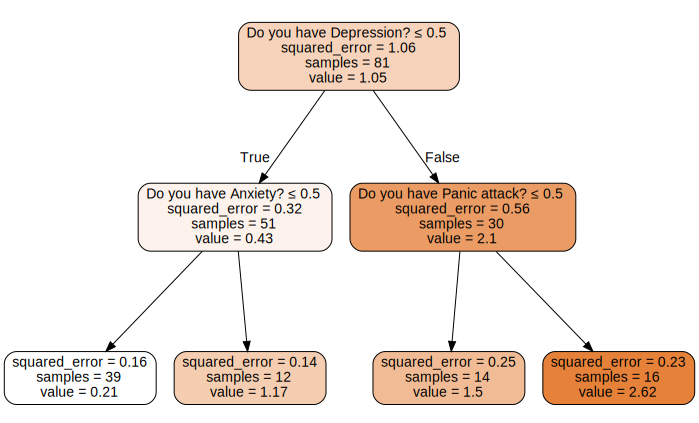

In [201]:
# draw tree
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

0. The top node represents the initial model before any splits have been done, when all the data is in one group. This is the simplest possible model. It is the result of asking zero questions and will always predict the value to be the average value of the whole dataset.

1. The next row shows us that in the case that the question of depression is true, or false, the next question to ask should be about anxiety.

2. Finally, we see that the predictors work correctly, and scores of mental health are directly related to these truth of falsehood of the main questions.

> Future work: then ask, what are good predictors for each of these questions?

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


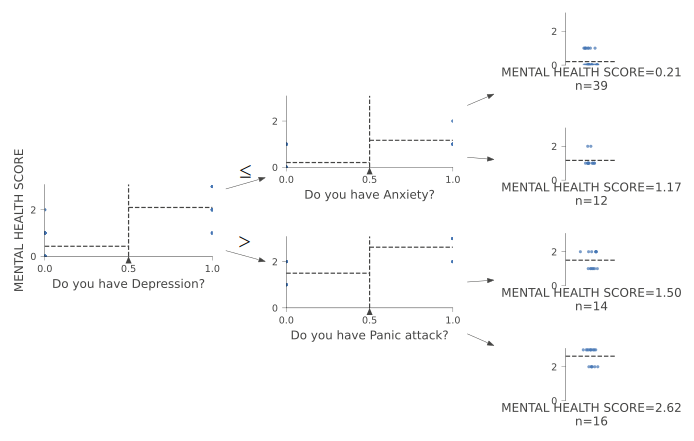

In [202]:
samp_idx = np.random.permutation(len(y))[:250]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [ ]:
# build larger regressor
m = DecisionTreeRegressor()
m.fit(xs, y);

In [ ]:
# check root mean squared
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [ ]:
# perfect model?
m_rmse(m, xs, y)

0.0

In [ ]:
# pretty good?
m_rmse(m, valid_xs, valid_y)

0.0

# Random Forests



In [203]:
# create random forest
def rf(xs, y, n_estimators=20, max_samples=79,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [204]:
m = rf(xs, y);

In [205]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.245766, 0.224202)

In [206]:
preds = np.stack([t.predict(valid_xs.values) for t in m.estimators_])

In [207]:
r_mse(preds.mean(0), valid_y)

0.224202

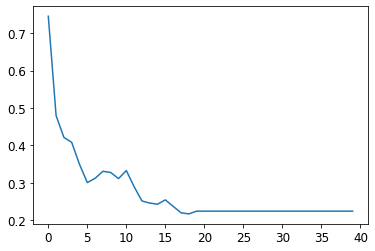

In [208]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [209]:
r_mse(m.oob_prediction_, y)

0.328013